In [241]:
from sympy import solve
from sympy import Symbol
from math import cos, sin, pi, sqrt, tan
import numpy as np
import matplotlib.pyplot as plt

x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, 3, 1.5)

In [338]:
def majoraxis(A, B, C, D, E):
    return sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
def minoraxis(A, B, C, D, E):
    return sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))

def printeq(A, B, C, D, E):
    print(majoraxis(A,B,C,D,E))
    print(minoraxis(A,B,C,D,E))

    print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")

3.8681815257621213
2.5787876838414148
1.8340151769242985x^2+-1xy+3.722927576827502y^2+-11.429852402312902x+-7.445855153655004y=0


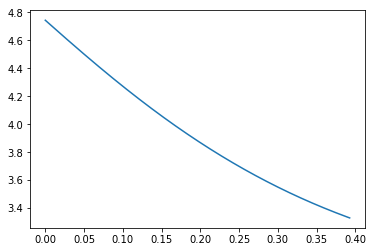

844.263273102894
562.8421820685961
1.8340151769242985x^2+-1xy+3.722927576827502y^2+-2933.8441069927744x+-7.445855153655004y=0


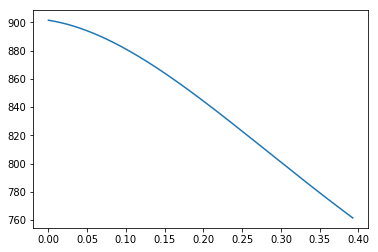

3.063683691990867
1.2254734767963473
0.5390857638599252x^2+-1xy+2.4972341503412854y^2+-0.586650351625427x+-4.994468300682571y=0


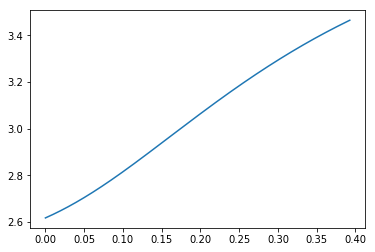

1.8838925615312347
1.2559283743541567
1.8340151769242985x^2+-1xy+3.722927576827502y^2+-3.07131363656602x+-7.445855153655004y=0


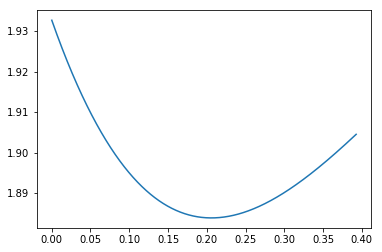

12.984839331099108
1.2984839331102822
0.13432600797387306x^2+-1xy+2.2901029592480713y^2+0.5794709141035574x+-4.580205918496143y=0


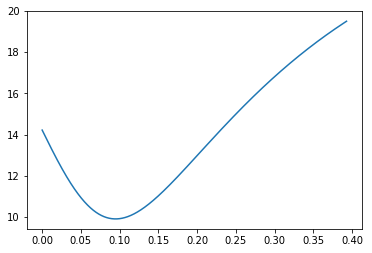

105.54378258813796
10.554378258816815
0.13432600797387306x^2+-1xy+2.2901029592480713y^2+7.09797673463257x+-9.160411836992285y=0


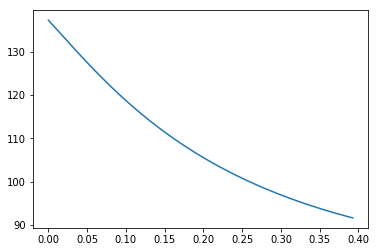

In [347]:
# second approach setting B to be 1.

def g2(a, b, y2, x3, y3):
    q = a**2 / b**2
    w = (a**2-b**2)/(a**2+b**2)
    def eq(tx):
        t = tan(2*tx)



        B = -1
        al = (w**2 + 1 +w)/(w**2 -1)
        C = (w + sqrt(t**2+1)/(2*t*w))
        if 4*C**2*w**2 + w**2-1 < 0:
            return 0
        A = (-C*w**2 - C + sqrt(4*C**2*w**2 + w**2-1))/(w**2-1)
        


        E = -C*y2
        D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3
        
        return (A, B, C, D, E)
    
    def f2(tx):
        if (eq(tx) == 0):
            return 0
        return majoraxis(*eq(tx))
    
    ang = 0.2
    if (eq(ang)==0):
        return 0
    
    printeq(*eq(ang))

    arr = np.linspace(0.0001, pi/8 - 1e-5, 2000)
    y = [f2(x) for x in arr]
    plt.plot(arr, y)
    plt.show()
    
g2(3, 2, 2, 3, 4)
g2(3, 2, 2, 3, 50)
g2(5, 2, 2, 3, 0.45)
g2(3, 2, 2, 3, 1.5)
g2(10, 1, 2, 3, 0.45)
g2(20, 2, 4, 1.1, 1)

#print(4*A*C-B**2)
#print((A-C)**2 + B**2)
#print(majoraxis(A, B, C, D, E))
#printeq(A, B, C, D, E)




In [157]:
th = 0.001
a = 10
b = 1

tx = -0.4


C=1


q = a**2 / b**2
w = (a**2-b**2)/(a**2+b**2)

A = (tx**2 + w**2 + 2*w * sqrt(tx**2 + 1) + 1)/(tx**2 - w**2 + 1)

#print(w**2*(A+C)**2 - (A-C)**2)
B = -sqrt(w**2*(A+C)**2 - (A-C)**2)

#B = (A+C**2)*(1-q)**2 - (A-C)**2

x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, 3, 400)

E = -C*y2
D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3

#print(B**2-4*A*C)

ar = sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
br = sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))


print(ar)
#print(q, ar**2/br**2)
print(f"x^2/{ar**2} + y^2/{br**2}=1")
print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")

24138.293259280603
x^2/582657201.4710314 + y^2/5826572.014710341=1
21.244717523529218x^2+-8.097887009411687xy+1y^2+-49891.24601547258x+-2y=0


In [269]:

def g(ae, be, xe, ye):
    def f(tx):
        C=1
        a = ae
        b = be
        q = a**2 / b**2
        w = (a**2-b**2)/(a**2+b**2)

        A = (tx**2 + w**2 + 2*w * sqrt(tx**2 + 1) + 1)/(tx**2 - w**2 + 1)

        #print(w**2*(A+C)**2 - (A-C)**2
        if w**2*(A+C)**2 - (A-C)**2 < 0:
            return 0
        
        B = sqrt(w**2*(A+C)**2 - (A-C)**2)

        #B = (A+C**2)*(1-q)**2 - (A-C)**2

        x1, y1, x2, y2, x3, y3 = (0,0, 0, 2, xe, ye)

        E = -C*y2
        D = -(A*x3**2 + B*x3*y3 + C*(y3**2-y2*y3))/x3

        #print(B**2-4*A*C)

        return sqrt((2*(A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))

    arr = np.linspace(0, pi/8, 2000)
    y = [f(tan(2*x)**2) for x in arr]
    plt.subplot(121)
    plt.plot(arr, y)
    plt.subplot(122)
    arr = np.linspace(pi/8, pi/4-0.1, 2000)
    y = [f(tan(2*x)**2) for x in arr]

    plt.plot(arr, y)

    #y2 = [tan(2*x) for x in arr]
    #plt.plot(arr, y2)

    plt.show()

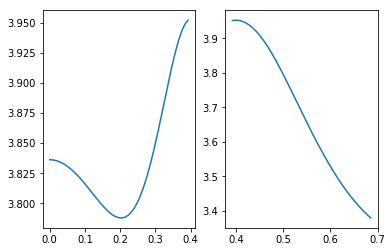

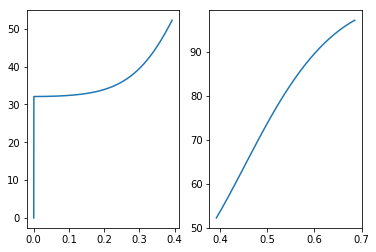

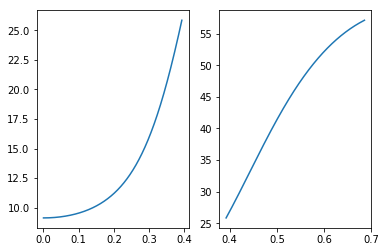

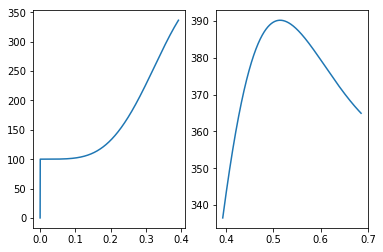

In [270]:
g(5, 2, 3, 0.45)
g(3.5, 2, 1, 11.5)
g(5, 2, 3, 10)
g(10, 1, 20, 1)